In [1]:
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from seaborn_qqplot import pplot
import numpy as np

In [2]:
df = pd.read_csv("میزان اعتیاد به اینترنت - Lable.xlsx - Results (1).csv")

In [3]:
df

,Gender,Age,Marital Status,Job,Education,Sadness,Cynicism,Failure,Anhedonia,Guilt,...,Q66,Unnamed: 92,تاریخ شروع,Unnamed: 94,تاریخ اتمام,زمان,BDI-II,Extraversion,Psychoticism,IA_Level
0,0,15,0,6,0,2,1,1,1,4,...,3,NaN,17:19:06,0:18:47,17:37:53,0:18:47,36,9,5,43
1,0,42,0,4,3,2,2,1,2,1,...,1,NaN,11:10:17,0:11:55,11:22:12,0:11:55,34,8,5,29
2,1,42,1,2,5,2,2,2,3,2,...,3,NaN,11:46:47,0:11:37,11:58:24,0:11:37,45,11,4,65
3,0,21,0,1,2,1,1,1,1,2,...,2,NaN,18:31:25,0:10:52,18:42:17,0:10:52,36,11,2,44
4,0,21,2,1,2,1,1,2,1,1,...,2,NaN,18:15:07,0:12:18,18:27:25,0:12:18,32,9,5,64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,24,0,2,2,2,2,2,1,2,...,2,NaN,18:18:36,0:12:02,18:30:38,0:12:02,34,11,5,36
76,0,20,0,1,0,1,1,1,2,1,...,3,NaN,18:19:47,0:07:18,18:27:05,0:07:18,35,16,11,66
77,0,22,0,1,2,2,1,1,1,2,...,2,NaN,18:08:58,0:11:33,18:20:31,0:11:33,32,15,6,71
78,0,22,0,1,2,2,2,2,3,2,...,3,NaN,17:53:58,0:13:02,18:07:00,0:13:02,56,6,14,65


In [4]:
df = df.drop(columns=["Unnamed: 92", "Unnamed: 94"], axis=1)

In [5]:
def time_to_seconds(time_str):
    parts = list(map(int, time_str.split(':')))
    if len(parts) == 3:  # H:MM:SS
        return parts[0] * 3600 + parts[1] * 60 + parts[2]
    elif len(parts) == 2:  # MM:SS
        return parts[0] * 60 + parts[1]
    else:
        return None
    
df[' زمان'] = df[' زمان'].apply(time_to_seconds)    

In [6]:
df.describe()

,Gender,Age,Marital Status,Job,Education,Sadness,Cynicism,Failure,Anhedonia,Guilt,...,Q62,Q63,Q64,Q65,Q66,زمان,BDI-II,Extraversion,Psychoticism,IA_Level
count,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,80.000000,...,80.000000,80.000000,80.000000,80.000000,80.000000,80.00000,80.000000,80.000000,80.000000,80.000000
mean,0.150000,26.075000,0.575000,2.137500,2.312500,1.725000,1.400000,1.475000,1.925000,1.537500,...,2.250000,2.475000,2.700000,1.775000,1.675000,1275.63750,35.275000,8.612500,5.825000,45.287500
std,0.359324,9.293764,0.882674,1.887626,1.308141,0.594809,0.704416,0.779078,0.924696,0.728163,...,1.277854,1.377716,1.286739,1.030853,1.003475,3168.71058,9.619304,4.150625,2.627869,15.083056
min,0.000000,14.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,338.00000,21.000000,1.000000,0.000000,21.000000
25%,0.000000,21.000000,0.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,2.000000,1.000000,1.000000,568.75000,29.000000,5.000000,4.000000,32.750000
50%,0.000000,22.000000,0.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1.000000,...,2.000000,2.000000,3.000000,1.000000,1.000000,726.50000,34.000000,9.000000,6.000000,43.500000
75%,0.000000,26.250000,1.000000,4.000000,3.000000,2.000000,2.000000,2.000000,3.000000,2.000000,...,3.000000,3.000000,3.000000,2.250000,2.000000,986.00000,39.000000,11.250000,7.000000,55.250000
max,1.000000,48.000000,3.000000,6.000000,6.000000,4.000000,4.000000,4.000000,4.000000,4.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,28519.00000,61.000000,17.000000,14.000000,83.000000


In [7]:
df.columns

Index(['Gender', 'Age', 'Marital Status', 'Job', 'Education', 'Sadness',
       'Cynicism', 'Failure', 'Anhedonia', 'Guilt', 'Stimulation',
       'Punishment', 'Self-loathing', 'Self-critical', 'Suicidal thoughts',
       'Irritability', 'Apathy', 'Indecisiveness', 'Crying', 'Self-worth',
       'Energy level', 'Sleep patterns', 'Appetite', 'Attention Span',
       'Exhaustion', 'Libido', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8',
       'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18',
       'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28',
       'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38',
       'Q39', 'Q40', 'Q41', 'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48',
       'Q49', 'Q50', 'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58',
       'Q59', 'Q60', 'Q61', 'Q62', 'Q63', 'Q64', 'Q65', 'Q66', 'تاریخ شروع',
       'تاریخ اتمام', ' زمان', 'BDI-II', 'Extraversion', 'Psychoticism',
       'IA_Level'],
     

In [8]:
df['bdi_fact'] = pd.cut(df['BDI-II'], bins=3, labels=["Low", "Mid", "High"])

In [9]:
df['Ex_fact'] = pd.cut(df['Extraversion'], bins=2, labels=["Extravert", "Intravert"])

In [10]:
df['Psy_fact'] = pd.cut(df['Psychoticism'], bins=3, labels=["Low", "Mid", "High"])

In [11]:
df['IA_fact'] = pd.cut(df['IA_Level'], bins=3, labels=["Low", "Mid", "High"])

In [12]:
columns = ['Sadness',
       'Cynicism', 'Failure', 'Anhedonia', 'Guilt', 'Stimulation',
       'Punishment', 'Self-loathing', 'Self-critical', 'Suicidal thoughts',
       'Irritability', 'Apathy', 'Indecisiveness', 'Crying', 'Self-worth',
       'Energy level', 'Sleep patterns', 'Appetite', 'Attention Span',
       'Exhaustion', 'Libido', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8',
       'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18',
       'Q19', 'Q20', 'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28',
       'Q29', 'Q30', 'Q31', 'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38',
       'Q39', 'Q40', 'Q41', 'Q42', 'Q43', 'Q44', 'Q45', 'Q46', 'Q47', 'Q48',
       'Q49', 'Q50', 'Q51', 'Q52', 'Q53', 'Q54', 'Q55', 'Q56', 'Q57', 'Q58',
       'Q59', 'Q60', 'Q61', 'Q62', 'Q63', 'Q64', 'Q65', 'Q66', 'تاریخ شروع', 'تاریخ اتمام']

In [13]:
df = df.rename(columns={"BDI-II": "BDI_II", "Marital Status": "Marital_Status"})

In [14]:
df = df.drop(columns=columns, axis=1)

In [15]:
num_cols = ['Age', 'BDI_II', 'Extraversion', 'Psychoticism', 'IA_Level']
desc_stats = df[num_cols].describe(percentiles=[.25, .5, .75])
desc_stats

,Age,BDI_II,Extraversion,Psychoticism,IA_Level
count,80.000000,80.000000,80.000000,80.000000,80.000000
mean,26.075000,35.275000,8.612500,5.825000,45.287500
std,9.293764,9.619304,4.150625,2.627869,15.083056
min,14.000000,21.000000,1.000000,0.000000,21.000000
25%,21.000000,29.000000,5.000000,4.000000,32.750000
50%,22.000000,34.000000,9.000000,6.000000,43.500000
75%,26.250000,39.000000,11.250000,7.000000,55.250000
max,48.000000,61.000000,17.000000,14.000000,83.000000


In [16]:
cat_cols = ['Gender', 'Marital_Status', 'Job', 'Education']
cat_stats = df[cat_cols].value_counts(normalize=True) * 100
cat_stats

Gender  Marital_Status  Job  Education
0       0               1    2            35.00
        2               1    2             8.75
        0               6    0             5.00
        1               5    3             3.75
        0               2    2             3.75
1       1               5    5             2.50
0       0               1    0             2.50
        3               1    2             2.50
        1               6    3             2.50
        0               0    3             1.25
                             1             1.25
                        4    3             1.25
                        5    6             1.25
        1               0    3             1.25
                        1    4             1.25
                             2             1.25
        0               4    4             1.25
                             5             1.25
                        5    4             1.25
                        1    4             1.25
 

<Axes: xlabel='Gender', ylabel='count'>

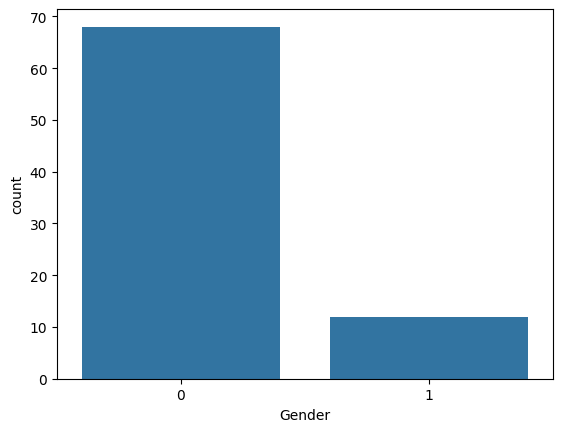

In [17]:
sns.countplot(data=df, x='Gender')

<Axes: ylabel='count'>

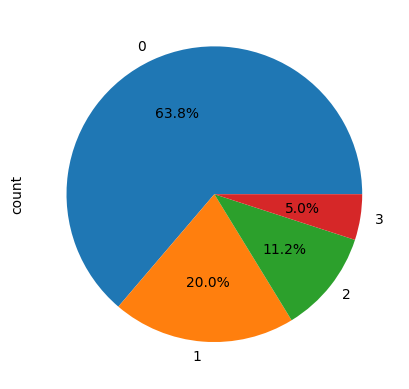

In [18]:
df['Marital_Status'].value_counts().plot.pie(autopct='%1.1f%%')

<Axes: xlabel='Age', ylabel='Count'>

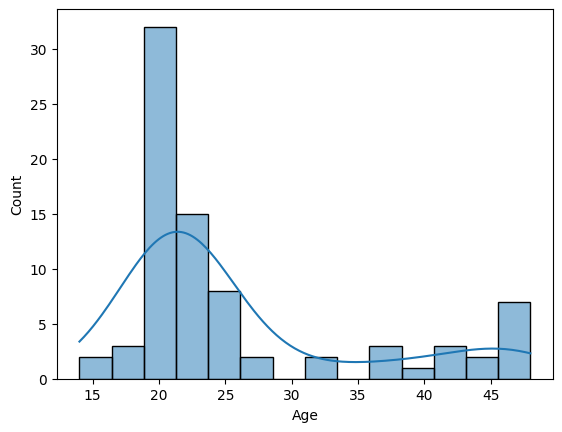

In [19]:
sns.histplot(data=df, x='Age', kde=True)

<Axes: xlabel='Extraversion', ylabel='IA_Level'>

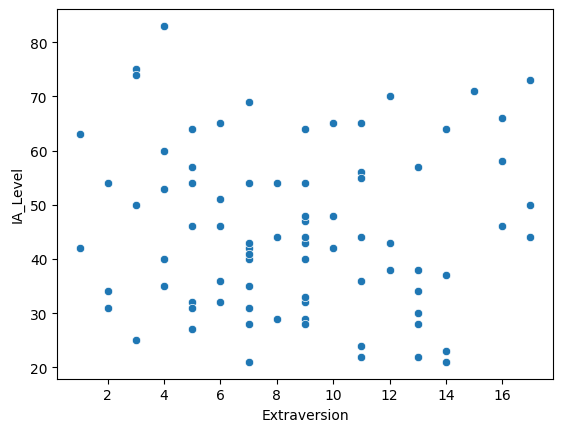

In [20]:
sns.scatterplot(data=df, x='Extraversion', y='IA_Level')

<Axes: xlabel='Psychoticism', ylabel='IA_Level'>

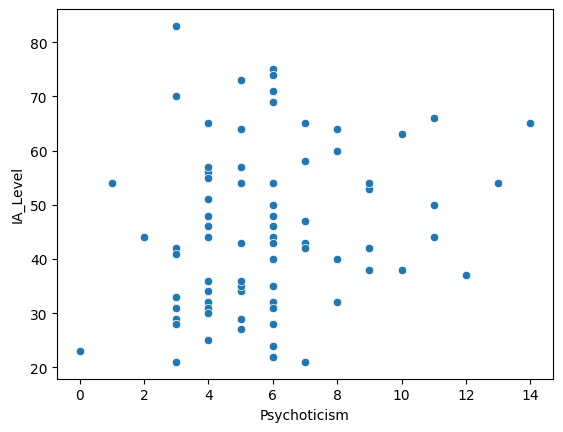

In [21]:
sns.scatterplot(data=df, x='Psychoticism', y='IA_Level')

<Axes: xlabel='BDI_II', ylabel='IA_Level'>

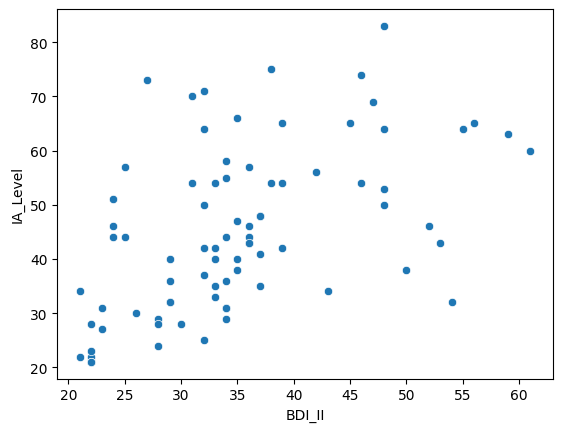

In [22]:
sns.scatterplot(data=df, x='BDI_II', y='IA_Level')

<Axes: xlabel='Age', ylabel='IA_Level'>

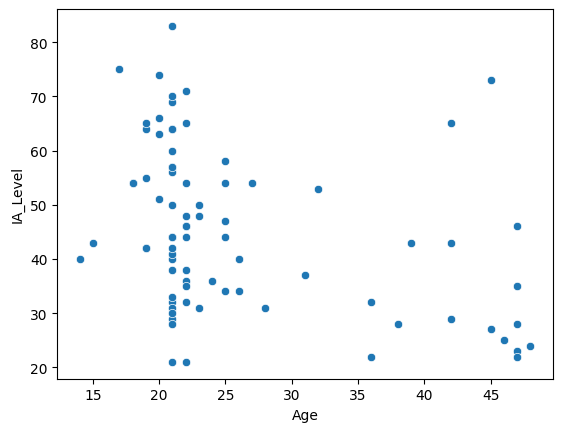

In [23]:
sns.scatterplot(data=df, x='Age', y='IA_Level')

<Axes: xlabel=' زمان', ylabel='IA_Level'>

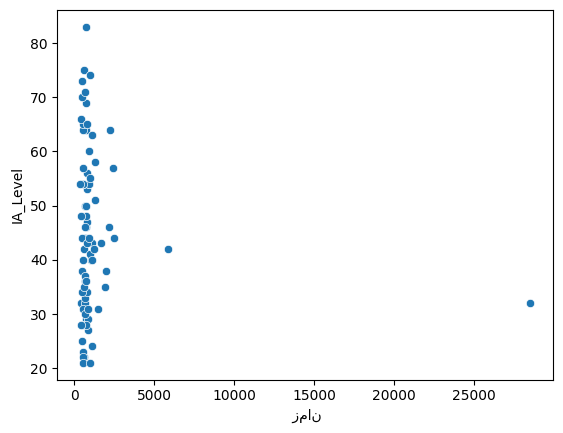

In [24]:
sns.scatterplot(data=df, x=' زمان', y='IA_Level')

<Axes: xlabel='Gender', ylabel='IA_Level'>

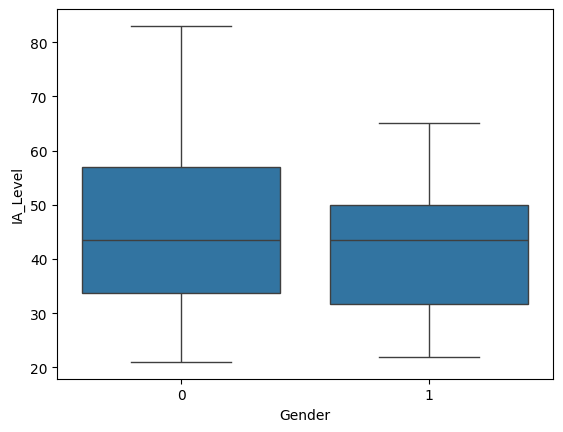

In [25]:
sns.boxplot(data=df, x='Gender', y='IA_Level')

<Axes: xlabel='Marital_Status', ylabel='IA_Level'>

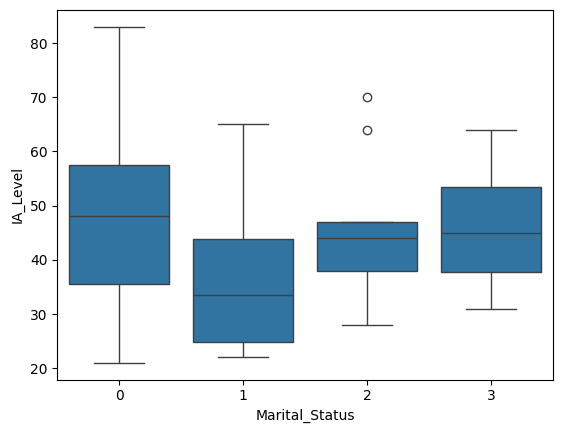

In [26]:
sns.boxplot(data=df, x='Marital_Status', y='IA_Level')

<Axes: xlabel='Job', ylabel='IA_Level'>

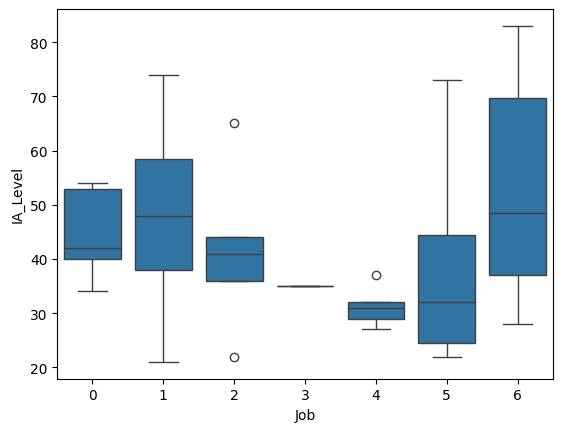

In [27]:
sns.boxplot(data=df, x='Job', y='IA_Level')

<Axes: xlabel=' زمان', ylabel='IA_Level'>

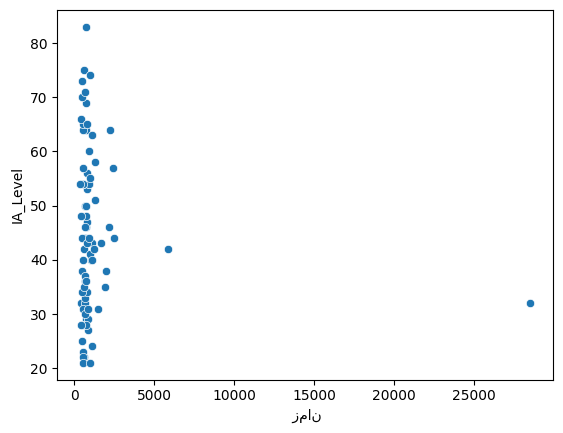

In [28]:
sns.scatterplot(data=df, x=' زمان', y='IA_Level')

In [29]:
df

,Gender,Age,Marital_Status,Job,Education,زمان,BDI_II,Extraversion,Psychoticism,IA_Level,bdi_fact,Ex_fact,Psy_fact,IA_fact
0,0,15,0,6,0,1127,36,9,5,43,Mid,Extravert,Mid,Mid
1,0,42,0,4,3,715,34,8,5,29,Low,Extravert,Mid,Low
2,1,42,1,2,5,697,45,11,4,65,Mid,Intravert,Low,High
3,0,21,0,1,2,652,36,11,2,44,Mid,Intravert,Low,Mid
4,0,21,2,1,2,738,32,9,5,64,Low,Extravert,Mid,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,0,24,0,2,2,722,34,11,5,36,Low,Intravert,Mid,Low
76,0,20,0,1,0,438,35,16,11,66,Mid,Intravert,High,High
77,0,22,0,1,2,693,32,15,6,71,Low,Intravert,Mid,High
78,0,22,0,1,2,782,56,6,14,65,High,Extravert,High,High


### Normality tests

In [30]:
from scipy.stats import skew

In [31]:
columns = ['BDI_II', 'Extraversion', 'Psychoticism', 'IA_Level', 'Gender', 'Age', 'Marital_Status', 'Job', 'Education', ' زمان']

skewness = df[columns].apply(lambda x: skew(x))
print("Skewness:")
print(skewness)

Skewness:
BDI_II            0.707049
Extraversion      0.210884
Psychoticism      0.848522
IA_Level          0.367534
Gender            1.960392
Age               1.341990
Marital_Status    1.382113
Job               0.982323
Education         0.465588
 زمان             8.129941
dtype: float64


In [32]:
male_BDI = df[df["Gender"] == 1]["BDI_II"]
fm_BDI = df[df["Gender"] == 0]["BDI_II"]

m_stat, m_p = stats.shapiro(male_BDI)
fm_stat, fm_p = stats.shapiro(fm_BDI)

print(f"Male BDI shapiro p-value: {m_p:.4f} and Female BDI Shapiro p-value: {fm_p}")

Male BDI shapiro p-value: 0.3349 and Female BDI Shapiro p-value: 0.0009945775778703325


In [33]:
stat, p = stats.shapiro(df['Education'])
print(f"Shapiro-Wilk Test: p-value = {p:.4f}")
if p > 0.05:
    print("Data is normally distributed (fail to reject H0)")
else:
    print("Data is NOT normally distributed (reject H0)")

Shapiro-Wilk Test: p-value = 0.0000
Data is NOT normally distributed (reject H0)


<Axes: xlabel='BDI_II', ylabel='Count'>

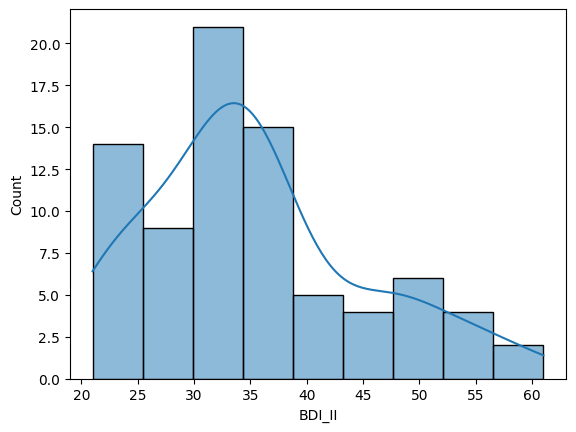

In [34]:
sns.histplot(data=df, x='BDI_II', kde=True)

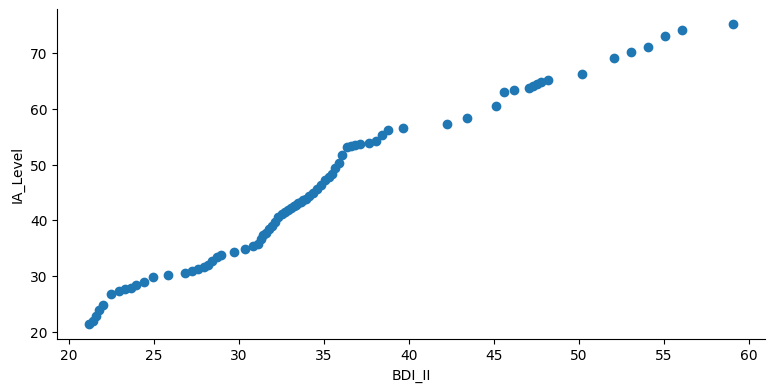

In [35]:
pplot(data=df, x="BDI_II", y="IA_Level", kind='qq', height=4, aspect=2)

In [36]:
stat, p = stats.shapiro(df['Education'])
print(f"Shapiro-Wilk Test: p-value = {p:.4f}")
if p > 0.05:
    print("Data is normally distributed (fail to reject H0)")
else:
    print("Data is NOT normally distributed (reject H0)")
    

Shapiro-Wilk Test: p-value = 0.0000
Data is NOT normally distributed (reject H0)


<Axes: xlabel='Education', ylabel='Count'>

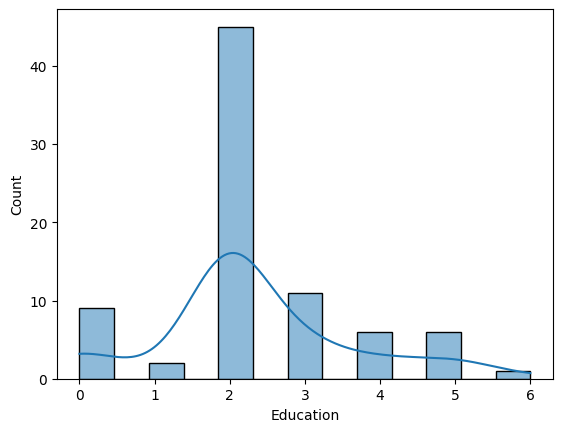

In [37]:
sns.histplot(data=df, x='Education', kde=True)

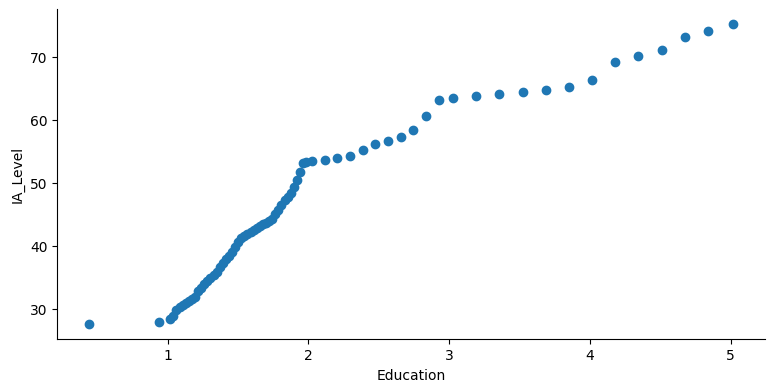

In [38]:
pplot(data=df, x="Education", y="IA_Level", kind='qq', height=4, aspect=2)

In [39]:
Male_Ex = df[df['Gender'] == 1]['Extraversion']
FM_EX = df[df['Gender'] == 0]['Extraversion']

m_stat, m_p = stats.shapiro(Male_Ex)
fm_stat, fm_p = stats.shapiro(FM_EX)

print(f"Male Extraversion shapiro p-value: {m_p:.4f} and Female Extraversion Shapiro p-value: {fm_p}")

Male Extraversion shapiro p-value: 0.3887 and Female Extraversion Shapiro p-value: 0.1912162927300966


In [40]:
stat, p = stats.shapiro(df['Extraversion'])
print(f"Shapiro-Wilk Test: p-value = {p:.4f}")
if p > 0.05:
    print("Data is normally distributed (fail to reject H0)")
else:
    print("Data is NOT normally distributed (reject H0)")
    

Shapiro-Wilk Test: p-value = 0.0798
Data is normally distributed (fail to reject H0)


<Axes: xlabel='Extraversion', ylabel='Count'>

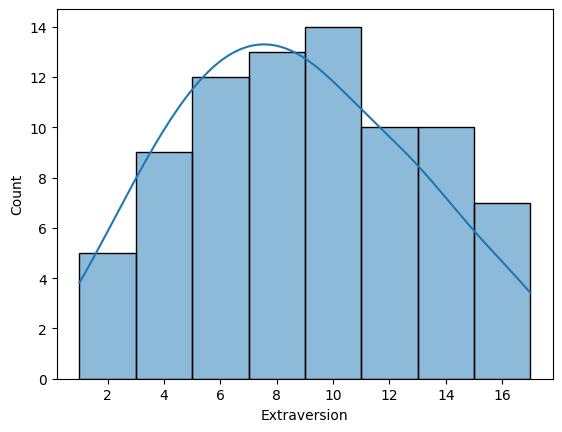

In [41]:
sns.histplot(data=df, x='Extraversion', kde=True)

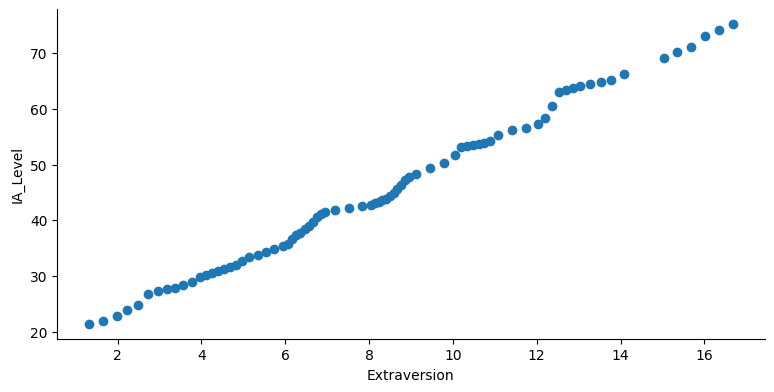

In [42]:
pplot(data=df, x="Extraversion", y="IA_Level", kind='qq', height=4, aspect=2)

In [43]:
Male_Ex = df[df['Gender'] == 1]['Psychoticism']
FM_EX = df[df['Gender'] == 0]['Psychoticism']

m_stat, m_p = stats.shapiro(Male_Ex)
fm_stat, fm_p = stats.shapiro(FM_EX)

print(f"Male Psychoticism shapiro p-value: {m_p:.4f} and Female Psychoticism Shapiro p-value: {fm_p}")

Male Psychoticism shapiro p-value: 0.1331 and Female Psychoticism Shapiro p-value: 0.000509477761494168


In [44]:
stat, p = stats.shapiro(df['Psychoticism'])
print(f"Shapiro-Wilk Test: p-value = {p:.4f}")
if p > 0.05:
    print("Data is normally distributed (fail to reject H0)")
else:
    print("Data is NOT normally distributed (reject H0)")
    

Shapiro-Wilk Test: p-value = 0.0004
Data is NOT normally distributed (reject H0)


<Axes: xlabel='Psychoticism', ylabel='Count'>

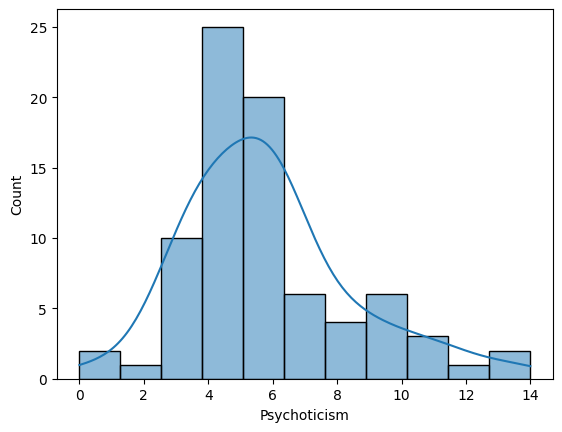

In [45]:
sns.histplot(data=df, x='Psychoticism', kde=True)

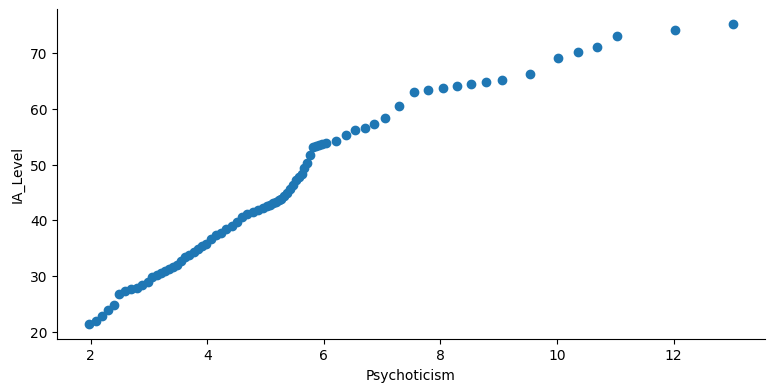

In [46]:
pplot(data=df, x="Psychoticism", y="IA_Level", kind='qq', height=4, aspect=2)

In [47]:
stat, p = stats.shapiro(df['IA_Level'])
print(f"Shapiro-Wilk Test: p-value = {p:.4f}")
if p > 0.05:
    print("Data is normally distributed (fail to reject H0)")
else:
    print("Data is NOT normally distributed (reject H0)")
    

Shapiro-Wilk Test: p-value = 0.0456
Data is NOT normally distributed (reject H0)


<Axes: xlabel='IA_Level', ylabel='Count'>

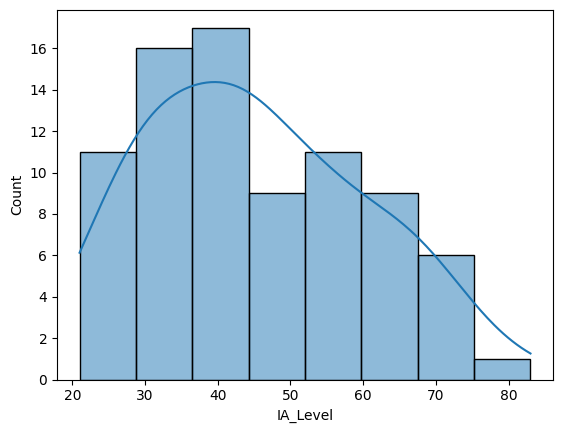

In [48]:
sns.histplot(data=df, x='IA_Level', kde=True)

In [49]:
male_scores = df[df['Gender'] == 1]['IA_Level']
female_scores = df[df['Gender'] == 0]['IA_Level']

stat_male, p_male = stats.shapiro(male_scores)
stat_fm, p_fm = stats.shapiro(female_scores)

print(f"Male group p-value = {p_male:.4f} and female group p-value = {p_fm:.4f}")

Male group p-value = 0.9249 and female group p-value = 0.0644


In [50]:
stat, p = stats.shapiro(df['Age'])
print(f"Shapiro-Wilk Test: p-value = {p:.4f}")
if p > 0.05:
    print("Data is normally distributed (fail to reject H0)")
else:
    print("Data is NOT normally distributed (reject H0)")
    

Shapiro-Wilk Test: p-value = 0.0000
Data is NOT normally distributed (reject H0)


<Axes: xlabel='Age', ylabel='Count'>

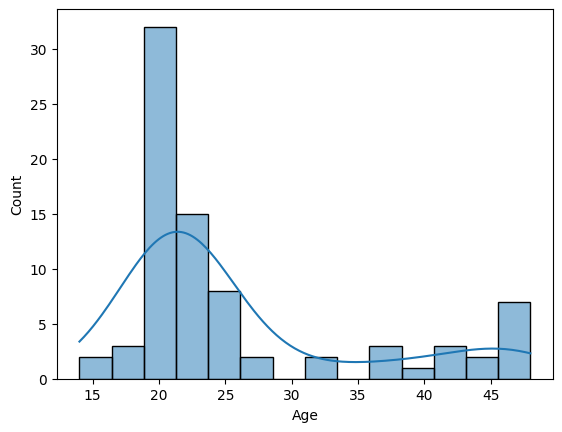

In [51]:
sns.histplot(data=df, x='Age', kde=True)

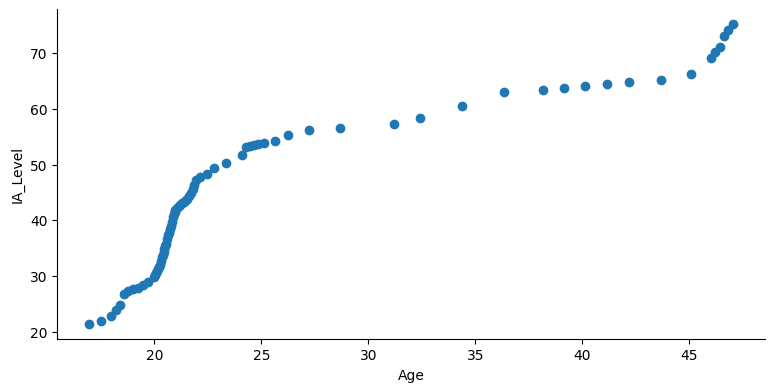

In [52]:
pplot(data=df, x="Age", y="IA_Level", kind='qq', height=4, aspect=2)

In [53]:
stat, p = stats.shapiro(df['Marital_Status'])
print(f"Shapiro-Wilk Test: p-value = {p:.4f}")
if p > 0.05:
    print("Data is normally distributed (fail to reject H0)")
else:
    print("Data is NOT normally distributed (reject H0)")
    

Shapiro-Wilk Test: p-value = 0.0000
Data is NOT normally distributed (reject H0)


<Axes: xlabel='Marital_Status', ylabel='Count'>

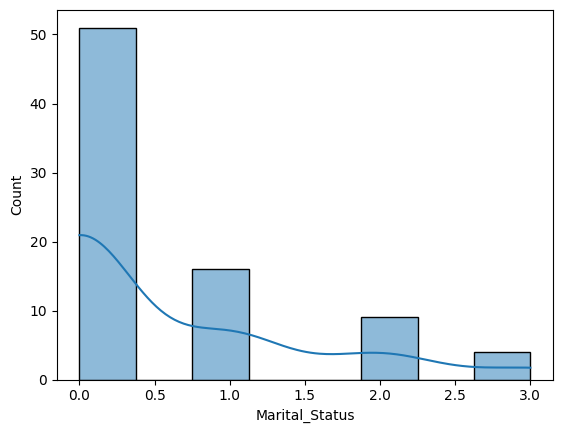

In [54]:
sns.histplot(data=df, x='Marital_Status', kde=True)

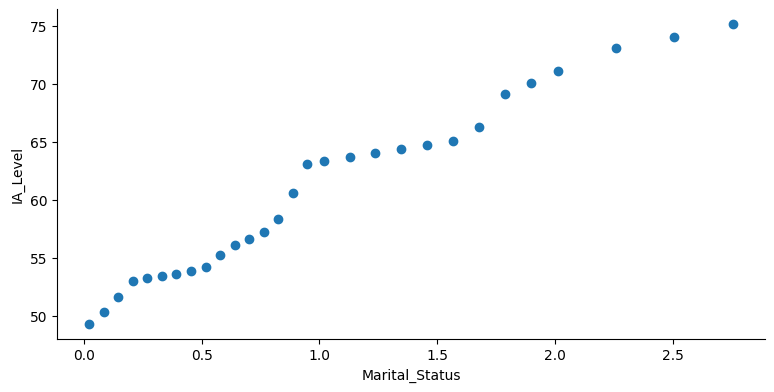

In [55]:
pplot(data=df, x="Marital_Status", y="IA_Level", kind='qq', height=4, aspect=2)

In [56]:
stat, p = stats.shapiro(df['Job'])
print(f"Shapiro-Wilk Test: p-value = {p:.4f}")
if p > 0.05:
    print("Data is normally distributed (fail to reject H0)")
else:
    print("Data is NOT normally distributed (reject H0)")

Shapiro-Wilk Test: p-value = 0.0000
Data is NOT normally distributed (reject H0)


<Axes: xlabel='Job', ylabel='Count'>

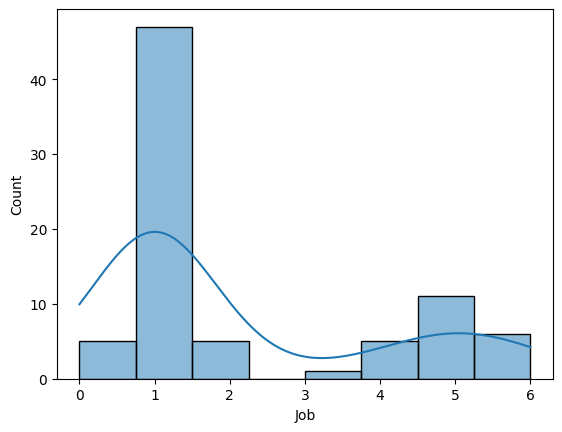

In [57]:
sns.histplot(data=df, x='Job', kde=True)

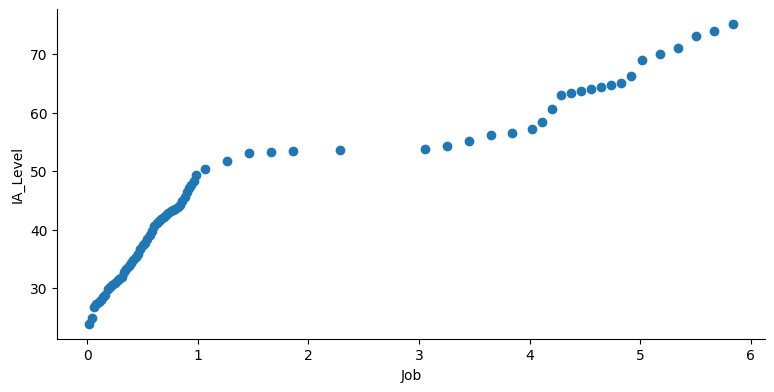

In [58]:
pplot(data=df, x="Job", y="IA_Level", kind='qq', height=4, aspect=2)

In [59]:
Male_Ex = df[df['Gender'] == 1][' زمان']
FM_EX = df[df['Gender'] == 0][' زمان']

m_stat, m_p = stats.shapiro(Male_Ex)
fm_stat, fm_p = stats.shapiro(FM_EX)

print(f"Male Time shapiro p-value: {m_p:.4f} and Female Time Shapiro p-value: {fm_p}")

Male Time shapiro p-value: 0.0006 and Female Time Shapiro p-value: 2.30458759439767e-17


In [60]:
stat, p = stats.shapiro(df[' زمان'])
print(f"Shapiro-Wilk Test: p-value = {p:.4f}")
if p > 0.05:
    print("Data is normally distributed (fail to reject H0)")
else:
    print("Data is NOT normally distributed (reject H0)")

Shapiro-Wilk Test: p-value = 0.0000
Data is NOT normally distributed (reject H0)


<Axes: xlabel=' زمان', ylabel='Count'>

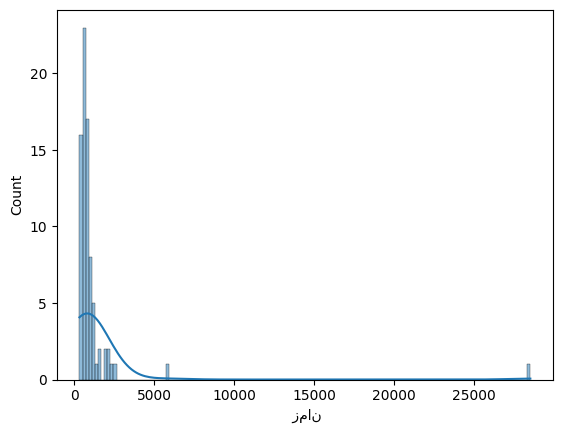

In [61]:
sns.histplot(data=df, x=' زمان', kde=True)

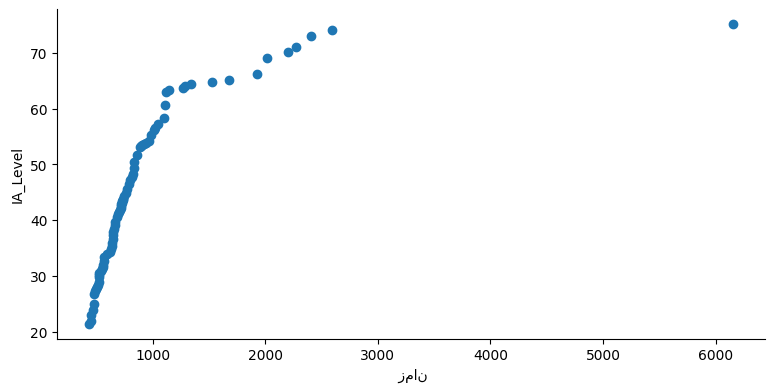

In [62]:
pplot(data=df, x=" زمان", y="IA_Level", kind='qq', height=4, aspect=2)

### Corrlation tests

In [63]:
r, p = stats.pearsonr(df['Extraversion'], df['IA_Level'])
print(f"Pearson’s r: {r:.3f}, p-value: {p:.4f}")

Pearson’s r: -0.023, p-value: 0.8418


In [65]:
rho, p = stats.spearmanr(df['BDI_II'], df['IA_Level'])
print(f"Spearman’s ρ: {rho:.3f}, p-value: {p:.4f}")

Spearman’s ρ: 0.542, p-value: 0.0000


In [66]:
rho, p = stats.spearmanr(df['Psychoticism'], df['IA_Level'])
print(f"Spearman’s ρ: {rho:.3f}, p-value: {p:.4f}")

Spearman’s ρ: 0.213, p-value: 0.0574


In [67]:
rho, p = stats.spearmanr(df[' زمان'], df['IA_Level'])
print(f"Spearman’s ρ: {rho:.3f}, p-value: {p:.4f}")

Spearman’s ρ: 0.050, p-value: 0.6594


In [68]:
rho, p = stats.spearmanr(df['Age'], df['IA_Level'])
print(f"Spearman’s ρ: {rho:.3f}, p-value: {p:.4f}")

Spearman’s ρ: -0.412, p-value: 0.0001


In [69]:
groups = [df[df['Marital_Status'] == level]['IA_Level'] for level in df['Marital_Status'].unique()]
stat, p = stats.kruskal(*groups)
print(f"Kruskal-Wallis p-value: {p:.4f}")

Kruskal-Wallis p-value: 0.0483


In [70]:
groups = [df[df['Education'] == level]['IA_Level'] for level in df['Education'].unique()]
stat, p = stats.kruskal(*groups)
print(f"Kruskal-Wallis p-value: {p:.4f}")

Kruskal-Wallis p-value: 0.0088


### Variance Tests

In [71]:
print(df.groupby('Gender')['IA_Level'].describe())

        count       mean        std   min    25%   50%   75%   max
Gender                                                            
0        68.0  45.926471  15.508607  21.0  33.75  43.5  57.0  83.0
1        12.0  41.666667  12.331286  22.0  31.75  43.5  50.0  65.0


In [72]:
male_scores = df[df['Gender'] == 1]['IA_Level']
female_scores = df[df['Gender'] == 0]['IA_Level']

statistic, p_value = stats.levene(male_scores, female_scores)
print("\nVariance Test (Levene): ", p_value)


Variance Test (Levene):  0.2851666858408935


In [73]:
print(df.groupby('Job')['IA_Level'].describe())

     count       mean        std   min   25%   50%    75%   max
Job                                                            
0      5.0  44.600000   8.648699  34.0  40.0  42.0  53.00  54.0
1     47.0  48.212766  13.961027  21.0  38.0  48.0  58.50  74.0
2      5.0  41.600000  15.565989  22.0  36.0  41.0  44.00  65.0
3      1.0  35.000000        NaN  35.0  35.0  35.0  35.00  35.0
4      5.0  31.200000   3.768289  27.0  29.0  31.0  32.00  37.0
5     11.0  37.909091  16.495178  22.0  24.5  32.0  44.50  73.0
6      6.0  53.000000  22.063545  28.0  37.0  48.5  69.75  83.0


In [74]:
job_groups = [df[df['Job'] == job]['IA_Level'] 
              for job in df['Job'].unique()]
stat, p = stats.levene(*job_groups)
print(f"Levene's test for job selection: statistic={stat:.3f}, p-value={p:.3f}")

Levene's test for job selection: statistic=2.070, p-value=0.067


In [75]:
print(df.groupby('Job')['IA_Level'].describe())

     count       mean        std   min   25%   50%    75%   max
Job                                                            
0      5.0  44.600000   8.648699  34.0  40.0  42.0  53.00  54.0
1     47.0  48.212766  13.961027  21.0  38.0  48.0  58.50  74.0
2      5.0  41.600000  15.565989  22.0  36.0  41.0  44.00  65.0
3      1.0  35.000000        NaN  35.0  35.0  35.0  35.00  35.0
4      5.0  31.200000   3.768289  27.0  29.0  31.0  32.00  37.0
5     11.0  37.909091  16.495178  22.0  24.5  32.0  44.50  73.0
6      6.0  53.000000  22.063545  28.0  37.0  48.5  69.75  83.0


In [77]:
print(df.groupby('BDI_II')['IA_Level'].describe())

        count       mean        std   min    25%   50%    75%   max
BDI_II                                                             
21        2.0  28.000000   8.485281  22.0  25.00  28.0  31.00  34.0
22        5.0  23.000000   2.915476  21.0  21.00  22.0  23.00  28.0
23        2.0  29.000000   2.828427  27.0  28.00  29.0  30.00  31.0
24        3.0  47.000000   3.605551  44.0  45.00  46.0  48.50  51.0
25        2.0  50.500000   9.192388  44.0  47.25  50.5  53.75  57.0
26        1.0  30.000000        NaN  30.0  30.00  30.0  30.00  30.0
27        1.0  73.000000        NaN  73.0  73.00  73.0  73.00  73.0
28        3.0  27.000000   2.645751  24.0  26.00  28.0  28.50  29.0
29        4.0  35.000000   3.829708  32.0  32.00  34.0  37.00  40.0
30        1.0  28.000000        NaN  28.0  28.00  28.0  28.00  28.0
31        2.0  62.000000  11.313708  54.0  58.00  62.0  66.00  70.0
32        6.0  48.166667  17.174594  25.0  38.25  46.0  60.50  71.0
33        5.0  40.800000   8.228001  33.0  35.00

In [78]:
marital_groups = [df[df['Marital_Status'] == status]['IA_Level'] 
                 for status in df['Marital_Status'].unique()]
stat, p = stats.levene(*marital_groups)
print(f"Levene's test for marital status: statistic={stat:.3f}, p-value={p:.3f}")

Levene's test for marital status: statistic=0.570, p-value=0.636


In [79]:
education_groups = [df[df['Education'] == level]['IA_Level'] for level in [0, 3, 5, 2, 4, 1, 6]]
stat, p = stats.levene(*education_groups)
print(f"\nLevene's test for education levels: statistic={stat:.3f}, p-value={p:.3f}")


Levene's test for education levels: statistic=2.128, p-value=0.060


In [81]:
low_group = df[df['Ex_fact'] == "Low"]['IA_Level']
mid_group = df[df['Ex_fact'] == "Mid"]['IA_Level']
high_group = df[df['Ex_fact'] == "High"]['IA_Level']

stat, p = stats.levene(low_group, mid_group, high_group)
print(f"Levene's test results: statistic={stat:.3f}, p-value={p:.3f}")

Levene's test results: statistic=nan, p-value=nan


C:\Users\ASUS\AppData\Local\Temp\ipykernel_8692\3991794654.py:5: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  stat, p = stats.levene(low_group, mid_group, high_group)


### Anova Tests

In [82]:
in_group = np.array(df[df['Ex_fact'] == "Extravert"]['IA_Level'])
ex_group = np.array(df[df['Ex_fact'] == "Intravert"]['IA_Level'])

In [83]:
f_statistic, p_value = stats.f_oneway(in_group, ex_group)

print("F Statistic:", f_statistic)
print("P Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the group means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the group means.")

F Statistic: 0.02996105866693286
P Value: 0.8630270083413025
Fail to reject the null hypothesis: There is no significant difference between the group means.


In [84]:
low_group = np.array(df[df['Psy_fact'] == "Low"]['IA_Level'])
mid_group = np.array(df[df['Psy_fact'] == "Mid"]['IA_Level'])
high_group = np.array(df[df['Psy_fact'] == "High"]['IA_Level'])

In [85]:
f_statistic, p_value = stats.f_oneway(low_group, mid_group, high_group)

print("F Statistic:", f_statistic)
print("P Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the group means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the group means.")

F Statistic: 1.485907783884974
P Value: 0.23271272041867141
Fail to reject the null hypothesis: There is no significant difference between the group means.


In [86]:
low_group = np.array(df[df['bdi_fact'] == "Low"]['IA_Level'])
mid_group = np.array(df[df['bdi_fact'] == "Mid"]['IA_Level'])
high_group = np.array(df[df['bdi_fact'] == "High"]['IA_Level'])

In [87]:
f_statistic, p_value = stats.f_oneway(low_group, mid_group, high_group)

print("F Statistic:", f_statistic)
print("P Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the group means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the group means.")

F Statistic: 10.127630296970558
P Value: 0.00012451982364453923
Reject the null hypothesis: There is a significant difference between the group means.


In [88]:
groups = {}
for st in df['Marital_Status'].unique():
    groups[str(st)] = np.array(df[df['Marital_Status'] == st]['IA_Level'])
    
matst_first = groups['0']
matst_sec = groups['1']
matst_third = groups['2']
Edu_frth = groups['3']    

In [89]:
f_statistic, p_value = stats.f_oneway(matst_first, matst_sec, matst_third, Edu_frth)

print("F Statistic:", f_statistic)
print("P Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the group means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the group means.")

F Statistic: 2.8062984268020794
P Value: 0.04526976947798083
Reject the null hypothesis: There is a significant difference between the group means.


In [90]:
groups = {}
for st in df['Education'].unique():
    groups[str(st)] = np.array(df[df['Education'] == st]['IA_Level'])
    
Edu_first = groups['0']
Edu_sec = groups['1']
Edu_third = groups['2']
Edu_frth = groups['3']    
Edu_fif = groups['4']  
Edu_six = groups['5']  
Edu_sev = groups['6']     

In [91]:
f_statistic, p_value = stats.f_oneway(Edu_first, Edu_sec, Edu_third, Edu_frth, Edu_fif, Edu_six, Edu_sev)

print("F Statistic:", f_statistic)
print("P Value:", p_value)

alpha = 0.05
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference between the group means.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference between the group means.")

F Statistic: 3.5364001785452137
P Value: 0.003963563710945149
Reject the null hypothesis: There is a significant difference between the group means.


In [92]:
formula = 'IA_Level ~ C(bdi_fact) + C(Psy_fact) + C(bdi_fact):C(Psy_fact)'

model = smf.ols(formula, data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

anova_table

,sum_sq,df,F,PR(>F)
C(bdi_fact),3146.914970,2.0,8.664788,0.000429
C(Psy_fact),71.690980,2.0,0.197396,0.821315
C(bdi_fact):C(Psy_fact),1264.562086,4.0,1.740937,0.150559
Residual,12893.042389,71.0,NaN,NaN


In [93]:
formula = 'IA_Level ~ C(Ex_fact) + C(Psy_fact) + C(Ex_fact):C(Psy_fact)'

model = smf.ols(formula, data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

anova_table

,sum_sq,df,F,PR(>F)
C(Ex_fact),0.336554,1.0,0.001487,0.969347
C(Psy_fact),661.303776,2.0,1.460633,0.238702
C(Ex_fact):C(Psy_fact),552.372843,2.0,1.220035,0.301088
Residual,16751.810047,74.0,NaN,NaN


In [94]:
formula = 'IA_Level ~ C(Gender) + C(Psy_fact) + C(Gender):C(Psy_fact)'

model = smf.ols(formula, data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

anova_table

,sum_sq,df,F,PR(>F)
C(Gender),319.152334,1.0,1.411169,0.238661
C(Psy_fact),801.931909,2.0,1.772918,0.176974
C(Gender):C(Psy_fact),249.409588,2.0,0.551397,0.578493
Residual,16735.957523,74.0,NaN,NaN


In [95]:
formula = 'IA_Level ~ C(bdi_fact) + C(Ex_fact) + C(bdi_fact):C(Ex_fact)'

model = smf.ols(formula, data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

anova_table

,sum_sq,df,F,PR(>F)
C(bdi_fact),3841.907926,2.0,10.389537,0.000105
C(Ex_fact),105.716714,1.0,0.571772,0.451956
C(bdi_fact):C(Ex_fact),441.487892,2.0,1.193900,0.308806
Residual,13682.090849,74.0,NaN,NaN


In [96]:
formula = 'IA_Level ~ C(Marital_Status) + C(Ex_fact) + C(Marital_Status):C(Ex_fact)'

model = smf.ols(formula, data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

anova_table

,sum_sq,df,F,PR(>F)
C(Marital_Status),1854.183458,3.0,2.862924,0.042637
C(Ex_fact),68.740909,1.0,0.318415,0.574315
C(Marital_Status):C(Ex_fact),567.612032,3.0,0.876413,0.457464
Residual,15543.691176,72.0,NaN,NaN


In [97]:
df.columns

Index(['Gender', 'Age', 'Marital_Status', 'Job', 'Education', ' زمان',
       'BDI_II', 'Extraversion', 'Psychoticism', 'IA_Level', 'bdi_fact',
       'Ex_fact', 'Psy_fact', 'IA_fact'],
      dtype='object')

In [98]:
import scikit_posthocs as sp

tukey_result = sp.posthoc_tukey(df, val_col='IA_Level', group_col='Education')
print("\nTukey's HSD Post-Hoc Test Results:")
print(tukey_result)



Tukey's HSD Post-Hoc Test Results:
          0         3         5         2         4         1         6
0  1.000000  0.004411  0.346939  0.582903  0.737302  0.865085  0.895515
3  0.004411  1.000000  0.890429  0.027765  0.522139  0.959345  0.077073
5  0.346939  0.890429  1.000000  0.923465  0.997599  0.999998  0.307823
2  0.582903  0.027765  0.923465  1.000000  0.999819  0.998998  0.503386
4  0.737302  0.522139  0.997599  0.999819  1.000000  0.999984  0.487413
1  0.865085  0.959345  0.999998  0.998998  0.999984  1.000000  0.530882
6  0.895515  0.077073  0.307823  0.503386  0.487413  0.530882  1.000000


In [101]:
tukey_result = sp.posthoc_tukey(df, val_col='IA_Level', group_col='Marital_Status')
print("\nTukey's HSD Post-Hoc Test Results:")
print(tukey_result)



Tukey's HSD Post-Hoc Test Results:
          0         1         2         3
0  1.000000  0.024757  0.952091  0.994693
1  0.024757  1.000000  0.421835  0.593106
2  0.952091  0.421835  1.000000  0.999587
3  0.994693  0.593106  0.999587  1.000000


In [102]:
tukey_result = sp.posthoc_tukey(df, val_col='IA_Level', group_col='bdi_fact')
print("\nTukey's HSD Post-Hoc Test Results:")
print(tukey_result)


Tukey's HSD Post-Hoc Test Results:
           Mid       Low      High
Mid   1.000000  0.001635  0.747557
Low   0.001635  1.000000  0.001653
High  0.747557  0.001653  1.000000
